In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio

In [2]:
paths = []
labels = []
for dirname, _, filenames in os.walk(r"C:\Users\User\Downloads\archive (3)"):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
        label = filename.split('_')[-1]
        label = label.split('.')[0]
        labels.append(label.lower())
print('Dataset is Loaded')


Dataset is Loaded


In [3]:
paths[:5]

['C:\\Users\\User\\Downloads\\archive (3)\\TESS Toronto emotional speech set data\\OAF_angry\\OAF_back_angry.wav',
 'C:\\Users\\User\\Downloads\\archive (3)\\TESS Toronto emotional speech set data\\OAF_angry\\OAF_bar_angry.wav',
 'C:\\Users\\User\\Downloads\\archive (3)\\TESS Toronto emotional speech set data\\OAF_angry\\OAF_base_angry.wav',
 'C:\\Users\\User\\Downloads\\archive (3)\\TESS Toronto emotional speech set data\\OAF_angry\\OAF_bath_angry.wav',
 'C:\\Users\\User\\Downloads\\archive (3)\\TESS Toronto emotional speech set data\\OAF_angry\\OAF_bean_angry.wav']

In [4]:
labels[:5]

['angry', 'angry', 'angry', 'angry', 'angry']

In [5]:
df=pd.DataFrame()
df['Speech']=paths
df['labels']=labels
df.head()

,Speech,labels
0,C:\Users\User\Downloads\archive (3)\TESS Toron...,angry
1,C:\Users\User\Downloads\archive (3)\TESS Toron...,angry
2,C:\Users\User\Downloads\archive (3)\TESS Toron...,angry
3,C:\Users\User\Downloads\archive (3)\TESS Toron...,angry
4,C:\Users\User\Downloads\archive (3)\TESS Toron...,angry


In [6]:
df['labels'].isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
5595    False
5596    False
5597    False
5598    False
5599    False
Name: labels, Length: 5600, dtype: bool

In [7]:
df['labels'].value_counts()

angry      800
disgust    800
fear       800
happy      800
neutral    800
ps         800
sad        800
Name: labels, dtype: int64

In [8]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df['labels_encoded'] = label_encoder.fit_transform(df['labels'])
df['labels_encoded']

0       0
1       0
2       0
3       0
4       0
       ..
5595    6
5596    6
5597    6
5598    6
5599    6
Name: labels_encoded, Length: 5600, dtype: int32

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='labels_encoded', ylabel='count'>

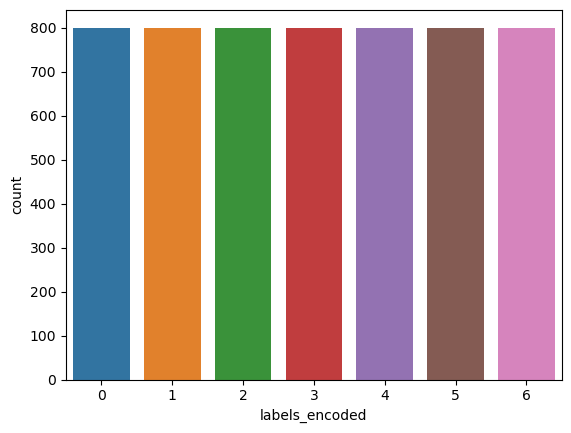

In [9]:
sns.countplot(df['labels_encoded'])

In [10]:
one_hot_encoded = pd.get_dummies(df['labels'])
one_hot_encoded

,angry,disgust,fear,happy,neutral,ps,sad
0,1,0,0,0,0,0,0
1,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0
3,1,0,0,0,0,0,0
4,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...
5595,0,0,0,0,0,0,1
5596,0,0,0,0,0,0,1
5597,0,0,0,0,0,0,1
5598,0,0,0,0,0,0,1


In [11]:
df

,Speech,labels,labels_encoded
0,C:\Users\User\Downloads\archive (3)\TESS Toron...,angry,0
1,C:\Users\User\Downloads\archive (3)\TESS Toron...,angry,0
2,C:\Users\User\Downloads\archive (3)\TESS Toron...,angry,0
3,C:\Users\User\Downloads\archive (3)\TESS Toron...,angry,0
4,C:\Users\User\Downloads\archive (3)\TESS Toron...,angry,0
...,...,...,...
5595,C:\Users\User\Downloads\archive (3)\TESS Toron...,sad,6
5596,C:\Users\User\Downloads\archive (3)\TESS Toron...,sad,6
5597,C:\Users\User\Downloads\archive (3)\TESS Toron...,sad,6
5598,C:\Users\User\Downloads\archive (3)\TESS Toron...,sad,6


In [12]:
def waveplot(data,sr,emotion):
    plt.figure(figsize=(10,4))
    plt.title(emotion,size=20)
    librosa.display.waveshow(data,sr=sr)
    plt.show()
    
    
def spectogram(data,sr,emotion):
    x=librosa.stft(data)
    xdb=librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(10,4))
    plt.title(emotion,size=20)
    librosa.display.specshow(xdb,sr=sr,x_axis='time',y_axis='hz')
    plt.colorbar()

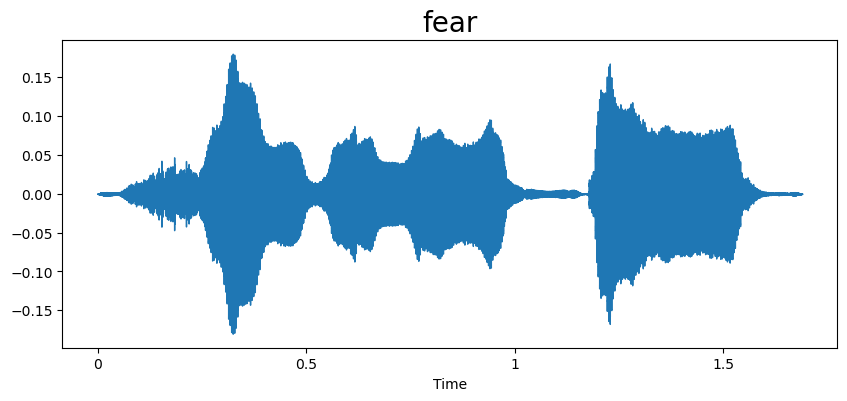

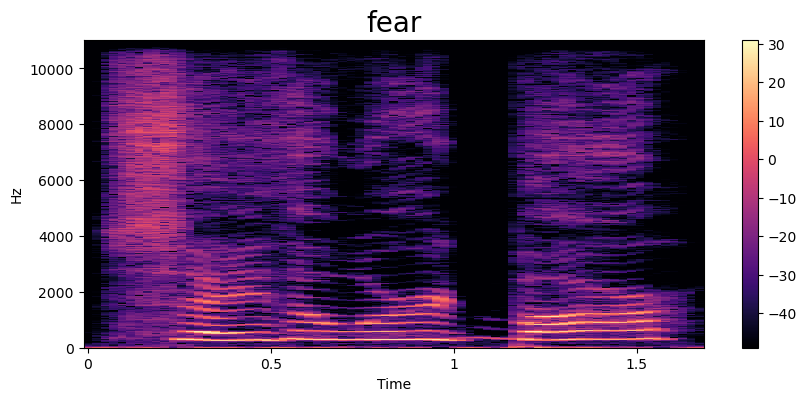

In [13]:
emotion='fear'
path=np.array(df['Speech'][df['labels']==emotion])[1]
data,sampling_rate=librosa.load(path)
waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)

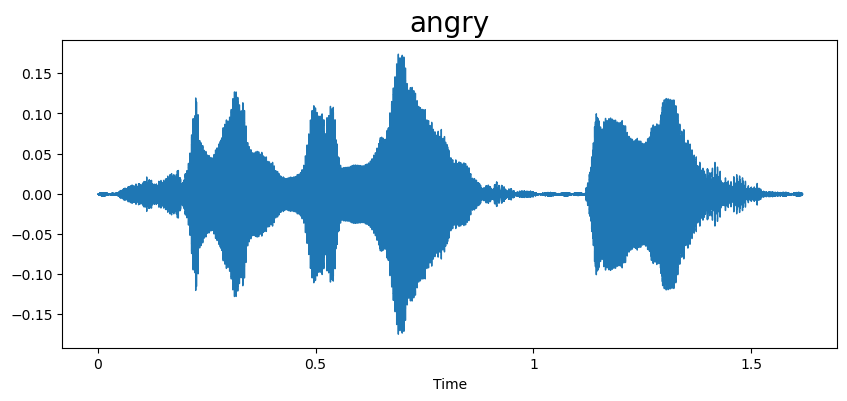

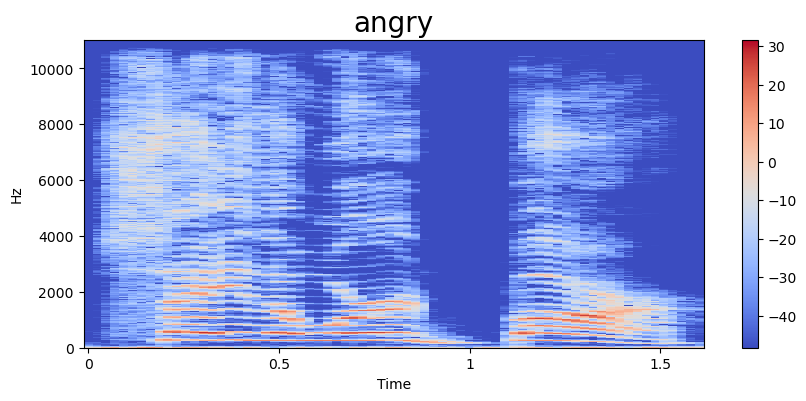

In [14]:
emotion='angry'
path=np.array(df['Speech'][df['labels']==emotion])[1]
data,sampling_rate=librosa.load(path)
waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)

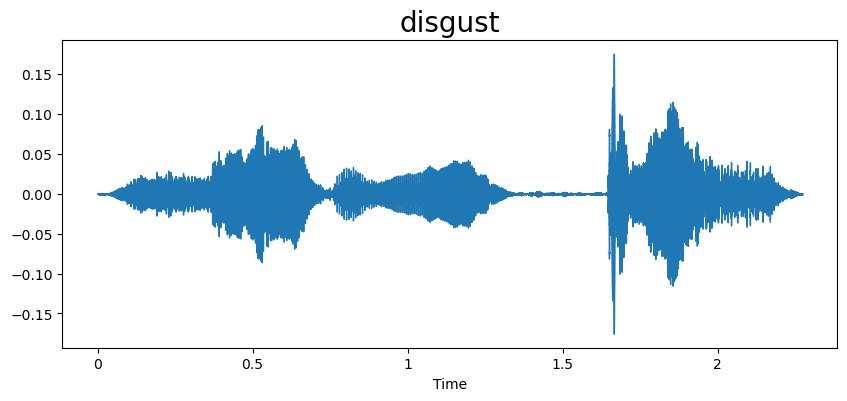

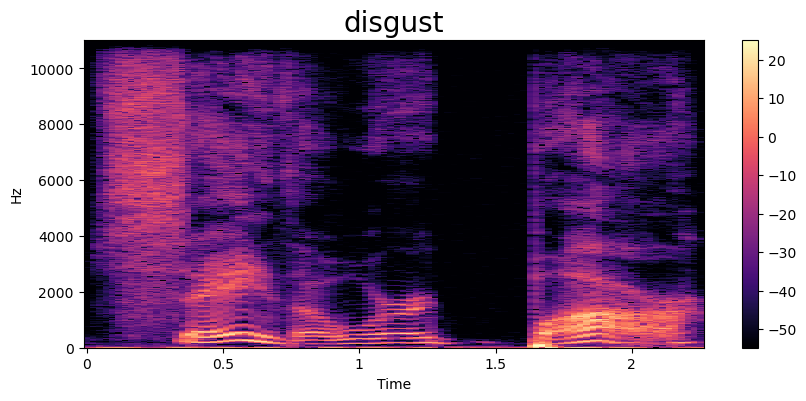

In [15]:
emotion='disgust'
path=np.array(df['Speech'][df['labels']==emotion])[1]
data,sampling_rate=librosa.load(path)
waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)

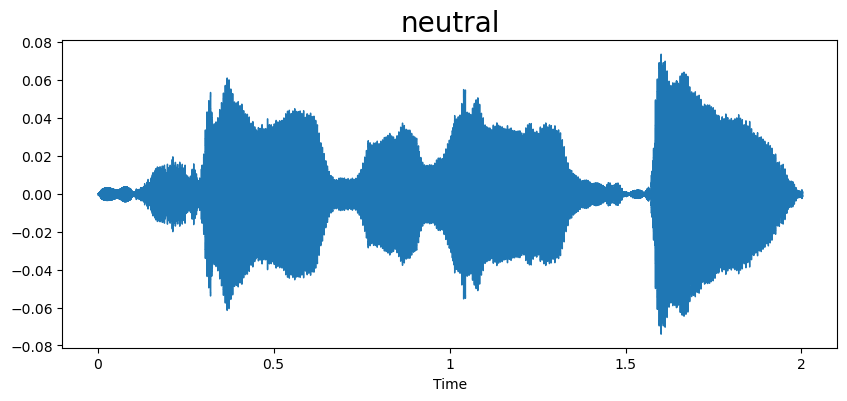

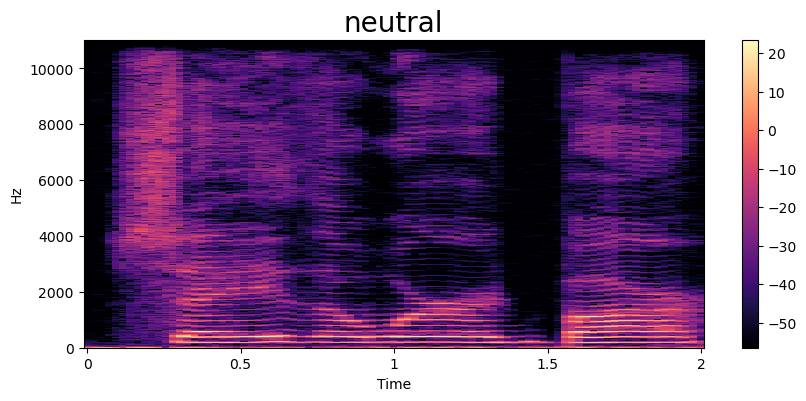

In [16]:
emotion='neutral'
path=np.array(df['Speech'][df['labels']==emotion])[1]
data,sampling_rate=librosa.load(path)
waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)

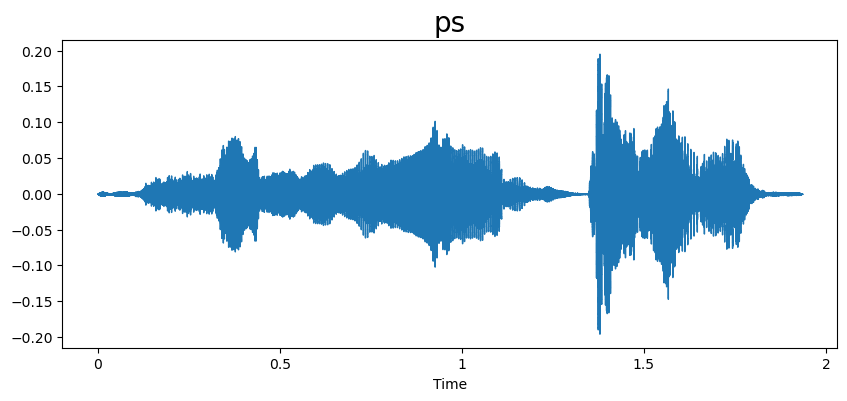

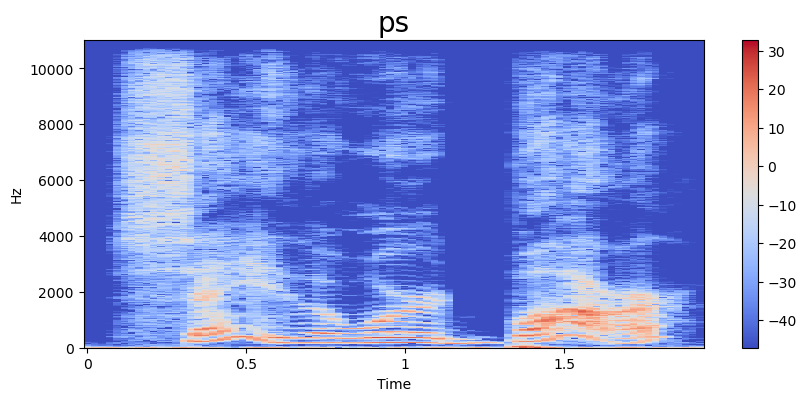

In [17]:
emotion='ps'
path=np.array(df['Speech'][df['labels']==emotion])[1]
data,sampling_rate=librosa.load(path)
waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)

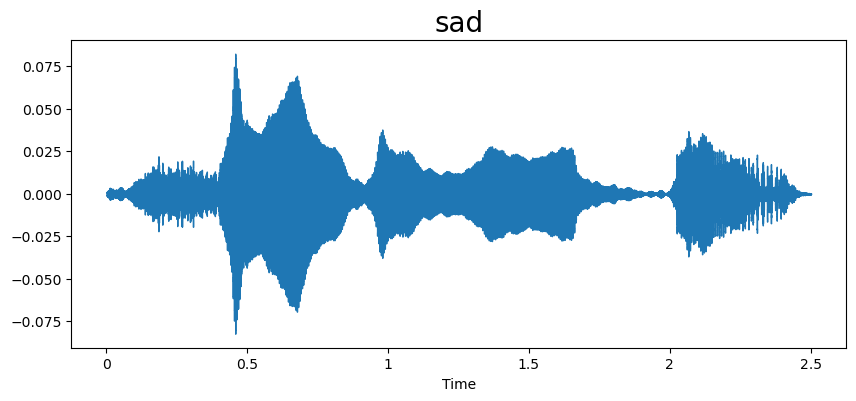

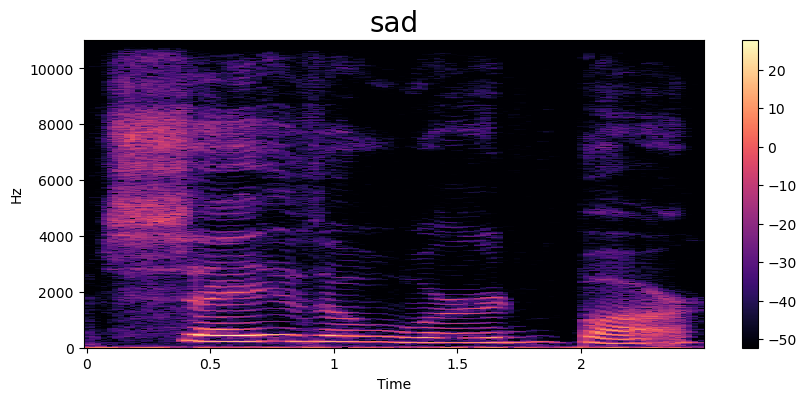

In [18]:
emotion='sad'
path=np.array(df['Speech'][df['labels']==emotion])[1]
data,sampling_rate=librosa.load(path)
waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)

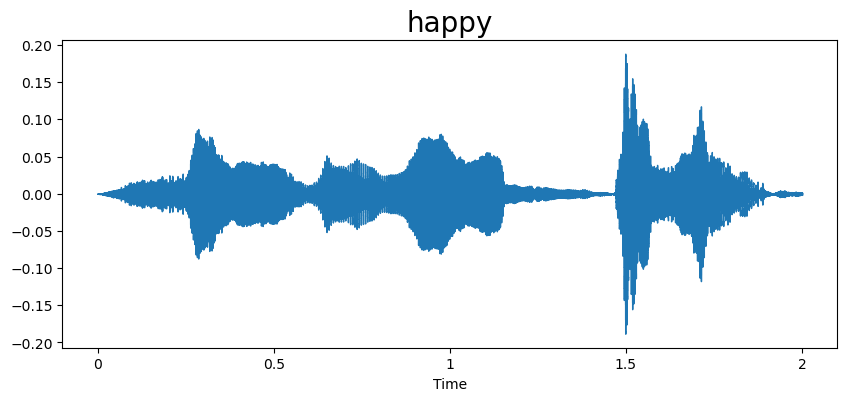

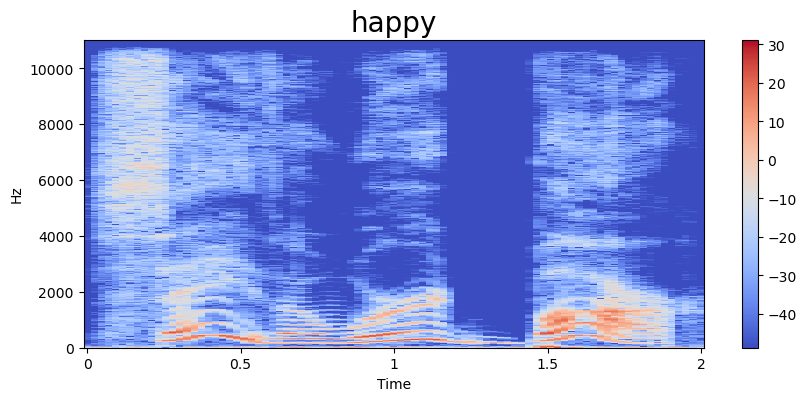

In [19]:
emotion='happy'
path=np.array(df['Speech'][df['labels']==emotion])[1]
data,sampling_rate=librosa.load(path)
waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)

In [20]:
def extract_mfcc(filename):
    y,sr=librosa.load(filename,duration=3,offset=0.5)
    mfcc=np.mean(librosa.feature.mfcc(y=y,sr=sr,n_mfcc=40).T,axis=0)
    return mfcc

In [21]:
extract_mfcc(df['Speech'][6])

array([-4.28411926e+02,  8.03389130e+01, -3.94467115e+00, -5.43493652e+00,
       -1.55631483e+00, -5.68939783e-02, -1.74302425e+01,  1.97004104e+00,
       -8.12821865e+00, -1.53992200e+00, -1.44865465e+01,  4.06355381e+00,
       -6.21964836e+00,  1.79584742e+00, -3.75390553e+00,  1.18853724e+00,
       -2.10874891e+00, -6.16074324e+00, -5.35235023e+00, -1.55431166e+01,
       -1.45428443e+00,  1.06286068e+01,  1.11821814e+01,  2.21055622e+01,
        2.37451801e+01,  1.81064644e+01,  7.75434113e+00,  3.53794456e+00,
       -6.96684241e-01,  9.14364147e+00,  6.38458681e+00,  5.65343189e+00,
        2.79406023e+00, -3.16522408e+00,  5.94337559e+00,  4.51563883e+00,
        3.69344568e+00,  5.97689986e-01, -2.01238632e+00,  3.32265854e+00],
      dtype=float32)

In [22]:
x_mfcc=df['Speech'].apply(lambda x:extract_mfcc(x))

In [23]:
x_mfcc

0       [-396.9862, 77.44054, -19.59279, -21.666689, -...
1       [-465.73267, 98.77373, 0.65600884, -32.74544, ...
2       [-429.79196, 46.124, 1.5550473, -0.21709493, 2...
3       [-403.46118, 76.32369, -12.531774, -22.288858,...
4       [-434.05756, 77.4455, 10.8655, 16.092943, 8.04...
                              ...                        
5595    [-406.48053, 80.379875, 32.462395, 46.579094, ...
5596    [-426.90918, 102.54757, 24.800041, 43.048096, ...
5597    [-378.50494, 80.91062, 35.300533, 39.74792, -4...
5598    [-434.8618, 89.90637, 28.373262, 39.57707, -2....
5599    [-421.8341, 70.69788, 32.476387, 45.642555, 4....
Name: Speech, Length: 5600, dtype: object

In [24]:
X=[x for x in x_mfcc]
X=np.array(X)
X.shape

(5600, 40)

In [25]:
X=np.expand_dims(X,-1)
X.shape

(5600, 40, 1)

In [26]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [27]:
from keras.utils import to_categorical
y=to_categorical(df['labels_encoded'])
y.shape

(5600, 7)

In [28]:
y

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [29]:
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout
model=Sequential([
    LSTM(123,return_sequences=False,input_shape=(40,1)),
    Dense(64,activation='relu'),
    Dropout(0.2),
    Dense(32,activation='relu'),
    Dropout(0.2),
    Dense(7,activation='softmax')
])

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 123)               61500     
                                                                 
 dense (Dense)               (None, 64)                7936      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 7)                 231       
                                                                 
Total params: 71747 (280.26 KB)
Trainable params: 71747 

In [30]:
#train
history=model.fit(X,y,validation_split=0.2,epochs=100,batch_size=512,shuffle=True)

Epoch 1/100
9/9 [==============================] - 15s 810ms/step - loss: 1.8363 - accuracy: 0.2650 - val_loss: 1.7089 - val_accuracy: 0.4482
Epoch 2/100
9/9 [==============================] - 4s 476ms/step - loss: 1.5625 - accuracy: 0.4183 - val_loss: 1.4268 - val_accuracy: 0.4411
Epoch 3/100
9/9 [==============================] - 4s 452ms/step - loss: 1.2283 - accuracy: 0.5199 - val_loss: 1.0026 - val_accuracy: 0.5098
Epoch 4/100
9/9 [==============================] - 4s 428ms/step - loss: 0.9643 - accuracy: 0.6174 - val_loss: 0.8660 - val_accuracy: 0.5857
Epoch 5/100
9/9 [==============================] - 4s 500ms/step - loss: 0.8162 - accuracy: 0.6654 - val_loss: 0.7084 - val_accuracy: 0.6313
Epoch 6/100
9/9 [==============================] - 4s 454ms/step - loss: 0.6802 - accuracy: 0.7353 - val_loss: 0.5230 - val_accuracy: 0.7500
Epoch 7/100
9/9 [==============================] - 4s 425ms/step - loss: 0.5424 - accuracy: 0.7953 - val_loss: 0.4155 - val_accuracy: 0.7991
Epoch 8/100


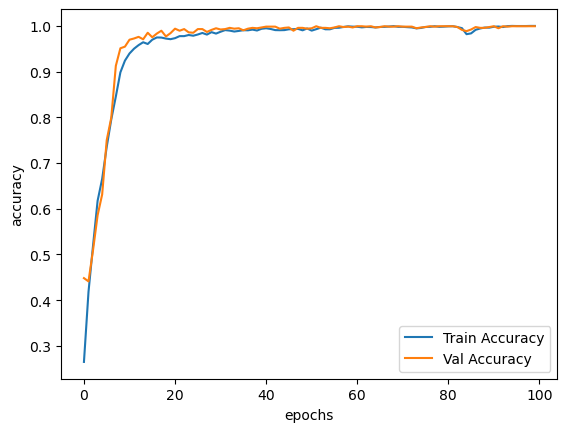

In [31]:
epochs=list(range(100))
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
plt.plot(epochs,acc,label='Train Accuracy')
plt.plot(epochs,val_acc,label='Val Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

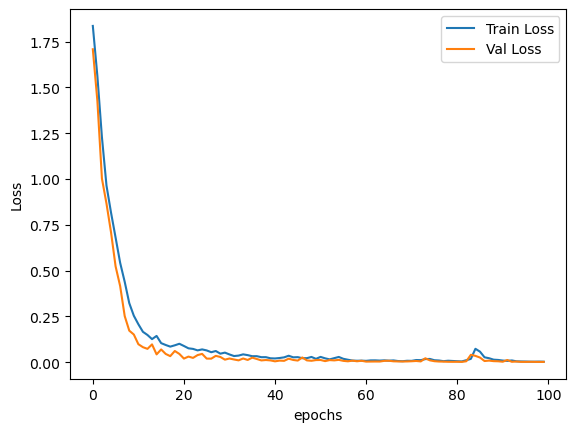

In [32]:
epochs=list(range(100))
loss=history.history['loss']
val_loss=history.history['val_loss']
plt.plot(epochs,loss,label='Train Loss')
plt.plot(epochs,val_loss,label='Val Loss')
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# TESTING THE MODEL

In [44]:
file=r'C:\Users\User\OneDrive\Desktop\angryy.wav'

In [45]:
x_new_mfcc=extract_mfcc(file)
   

In [46]:
x_new_mfcc

array([-203.71127   ,   31.237106  ,  -29.7649    ,   -4.1967    ,
        -16.171604  ,  -10.366575  ,  -24.224531  ,  -15.5820465 ,
        -22.462692  ,  -13.666406  ,   -3.8765843 ,  -12.2436075 ,
         -8.562599  ,   -6.6336803 ,   -5.9647584 ,   -1.6022565 ,
         -8.183718  ,    2.6915336 ,    6.972529  ,    2.2979755 ,
          0.60346055,    3.243782  ,    1.9122957 ,    2.6968155 ,
          1.0177813 ,   -1.485236  ,   -6.2742853 ,   -1.2933086 ,
         -1.9117943 ,   -0.27756613,   -2.7942626 ,   -2.52876   ,
         -1.5561435 ,    0.25205982,   -1.7292386 ,    1.5849133 ,
          0.4625631 ,    2.8834333 ,   -2.1163964 ,   -2.4053993 ],
      dtype=float32)

In [47]:
X_new=np.array(x_new_mfcc)
X_new.shape

(40,)

In [48]:
X_new=np.expand_dims(X_new,-1)
X_new.shape
reshaped_row = X_new.reshape((1,40))
reshaped_row.shape

(1, 40)

In [49]:
y_pred_prob = model.predict(reshaped_row)


1/1 [==============================] - 0s 58ms/step


In [50]:
y_pred = np.argmax(y_pred_prob,axis=1)

In [51]:
y_pred

array([1], dtype=int64)

In [52]:
y_pred_decoded = label_encoder.inverse_transform(y_pred)

In [53]:
y_pred_decoded

array(['disgust'], dtype=object)

In [54]:
y_pred_decoded.shape

(1,)